In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline
from scipy.misc import derivative

C:\Users\majoj\AppData\Local\Temp\ipykernel_22500\550382035.py:7: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy.misc import derivative


ImportError: cannot import name 'derivative' from 'scipy.misc' (c:\Users\majoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\misc\__init__.py)

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Maria Jose Jaimes Gelves
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



Para h = 0.01, error máximo: 0.000000
Para h = 0.33, error máximo: 0.002156
Para h = 0.65, error máximo: 0.031925
Para h = 0.96, error máximo: 0.148798
Para h = 1.28, error máximo: 0.352783
Para h = 1.60, error máximo: 0.414451


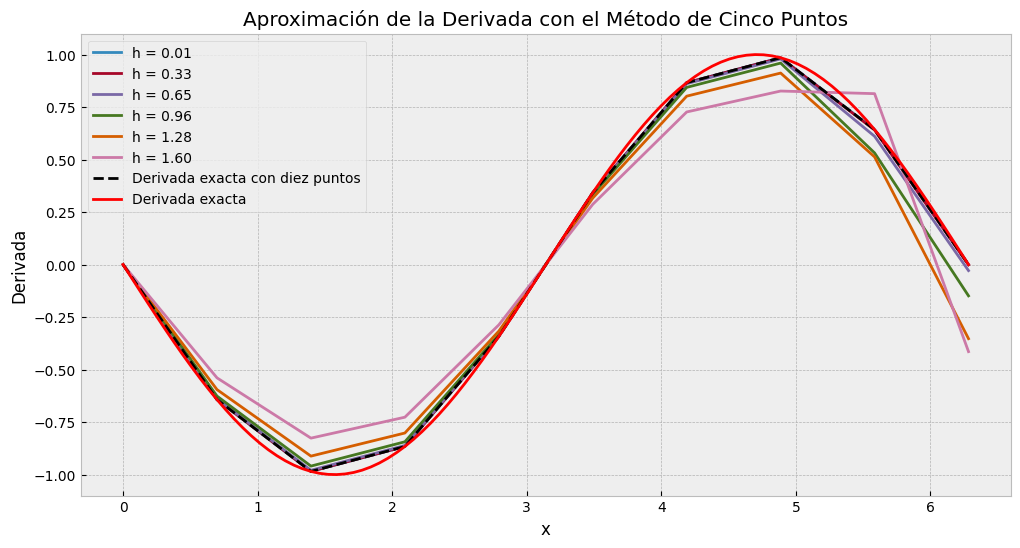

In [ ]:
# Función para calcular la derivada usando el método de cinco puntos
def five_point_derivate(f, x, h):
    '''
    Calcula la derivada de una función f en el punto x usando el método de cinco puntos
    Entrada:
        f: Función a derivar
        x: array de puntos donde se evalúa la derivada
        h: Paso para la aproximación
    Salida:
        derivada: Array con la aproximación de la derivada en los puntos x
    '''
    n = len(x) # Número de puntos
    derivada = np.zeros_like(x) # Inicializamos el array de derivadas
    
    
    for i in range(n):
        if i == 0 or i == 1: # Primeros dos puntos utilizamos una aproximación hacia adelante
            derivada[i] = (-25 * f(x[i]) + 48 * f(x[i] + h) - 36 * f(x[i] + 2 * h) + 16 * f(x[i] + 3 * h) - 3 * f(x[i] + 4 * h)) / (12 * h)
        if i == n - 2 or i == n - 1: # Últimos dos puntos utilizamos una aproximación hacia atrás
            derivada[i] = (25 * f(x[i]) - 48 * f(x[i] - h) + 36 * f(x[i] - 2 * h) - 16 * f(x[i] - 3 * h) + 3 * f(x[i] - 4 * h)) / (12 * h)
        else: # Para los puntos intermedios utilizamos la aproximación central de cinco puntos
            derivada[i] = (f(x[i] - 2 * h) - 8 * f(x[i] - h) + 8 * f(x[i] + h) - f(x[i] + 2 * h)) / (12 * h)
    return derivada

# <-- Ejemplo de uso -->

f = lambda x: np.cos(x)  # Definimos la función a derivar
df = lambda x: -np.sin(x)  # Derivada exacta de la función
h_valores = np.linspace(0.01, 1.6, 6)  # Valores de h para evaluar la convergencia
x = np.linspace(0, 2 * np.pi, 10)  # Puntos donde evaluamos la derivada
x_exacta = np.linspace(0, 2 * np.pi, 100)  # Puntos para graficar la función y su derivada

for h in h_valores:
    derivada_aproximada = five_point_derivate(f, x, h)  # Calculamos la derivada aproximada
    error = np.abs(derivada_aproximada - df(x))  # Calculamos el error
    print(f'Para h = {h:.2f}, error máximo: {np.max(error):.6f}')

# Graficamos la función y su derivada

plt.figure(figsize=(12, 6))
plt.style.use('bmh')

for h in h_valores:
    derivada_aproximada = five_point_derivate(f, x, h)
    plt.plot(x, derivada_aproximada, label=f'h = {h:.2f}')

plt.plot(x, df(x), 'k--', label='Derivada exacta con diez puntos', linewidth=2)
plt.plot(x_exacta, df(x_exacta), 'r-', label='Derivada exacta', linewidth=2)
plt.title('Aproximación de la Derivada con el Método de Cinco Puntos')
plt.xlabel('x')
plt.ylabel('Derivada')
plt.legend()


Para h =  0.010000, derivada en x = pi/8: -0.386440, error:  0.003757
Para h =  0.231111, derivada en x = pi/8: -0.386404, error:  0.003720
Para h =  0.452222, derivada en x = pi/8: -0.385914, error:  0.003230
Para h =  0.673333, derivada en x = pi/8: -0.383927, error:  0.001244
Para h =  0.894444, derivada en x = pi/8: -0.378935, error:  0.003749
Para h =  1.115556, derivada en x = pi/8: -0.369228, error:  0.013455
Para h =  1.336667, derivada en x = pi/8: -0.353211, error:  0.029472
Para h =  1.557778, derivada en x = pi/8: -0.329698, error:  0.052985
Para h =  1.778889, derivada en x = pi/8: -0.298158, error:  0.084526
Para h =  2.000000, derivada en x = pi/8: -0.258861, error:  0.123822


Text(0, 0.5, 'Error')

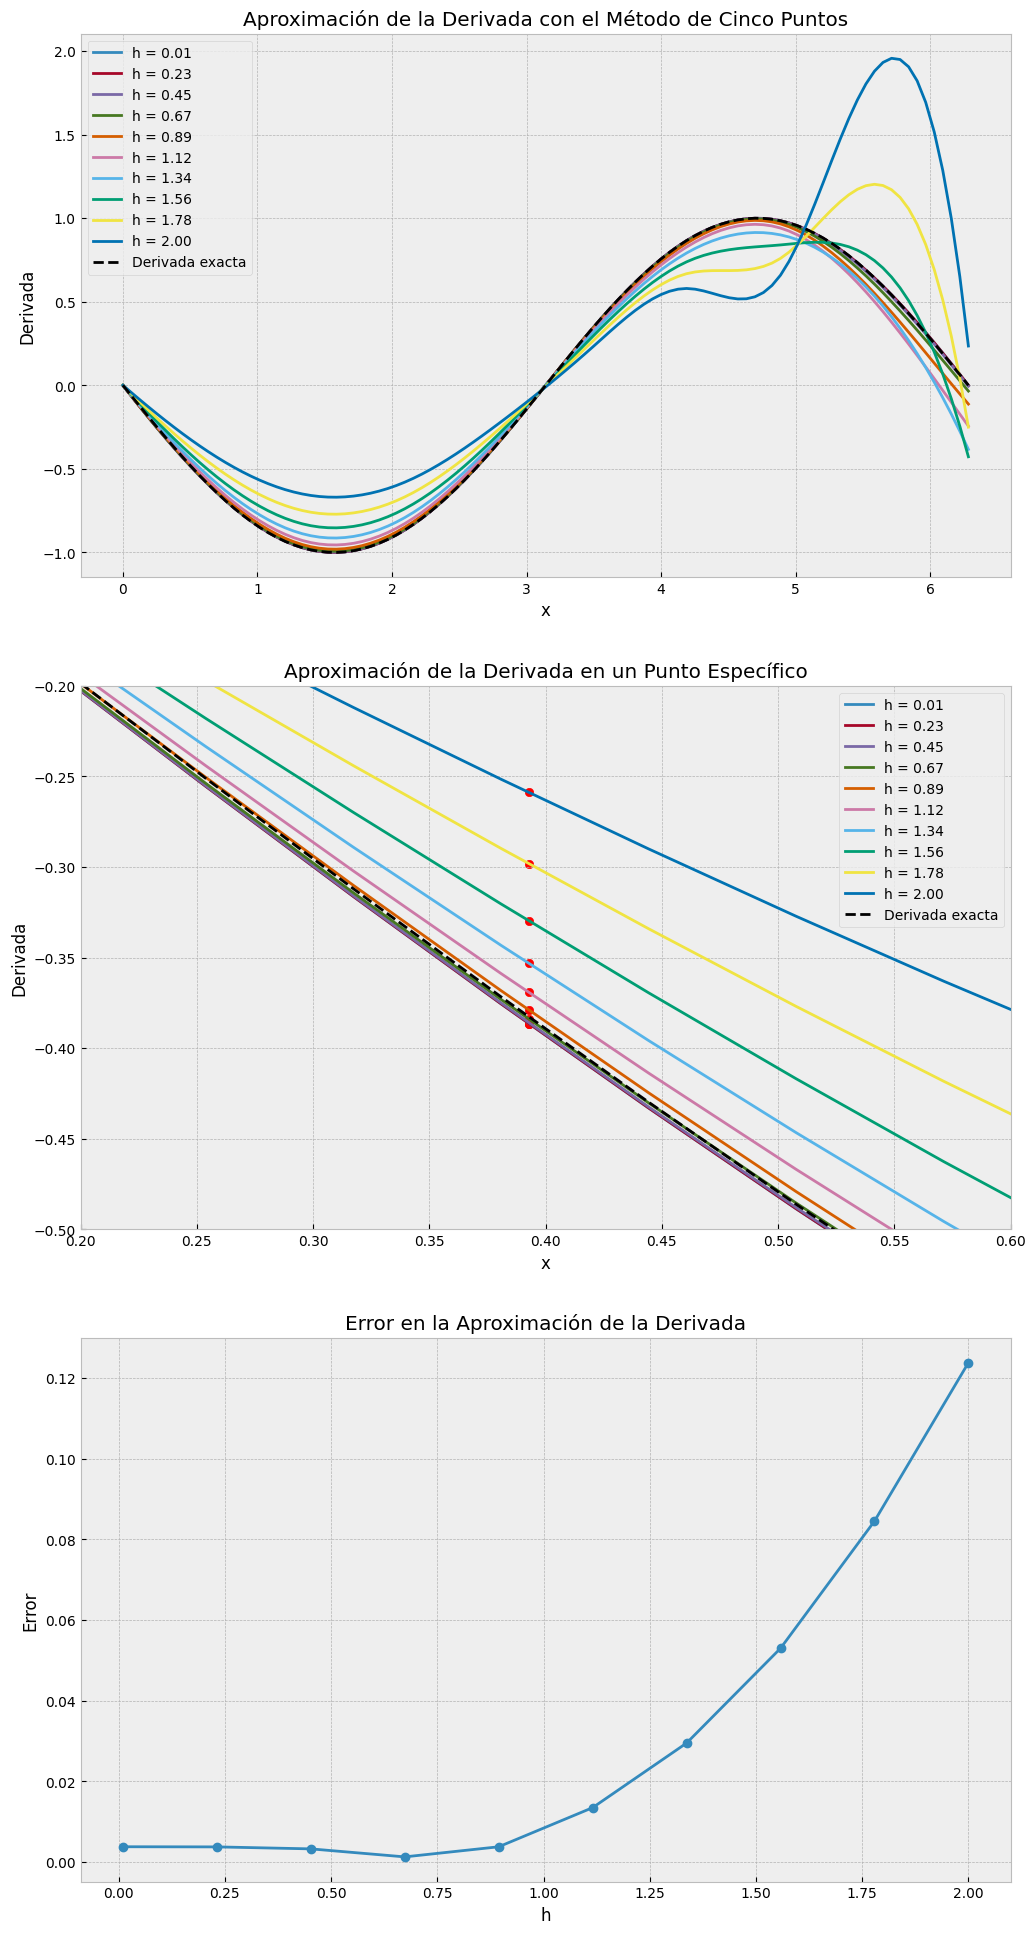

In [3]:
# Ahora vamos a probar en un punto específico

f = lambda x: np.cos(x)  # Definimos la función a derivar
df = lambda x: -np.sin(x)  # Derivada exacta de la función
h_valores = np.linspace(0.01, 2, 10)  # Valores de h para evaluar la convergencia
x = np.linspace(0, 2 * np.pi, 10)  # Puntos donde evaluamos la derivada
x_exacta = np.linspace(0, 2 * np.pi, 100)  # Puntos para graficar la función y su derivada

x_prueba = np.pi / 8 
derivada_punto = []
error_punto = []

for h in h_valores:
    derivada_aproximada = five_point_derivate(f, x, h) # Calculamos la derivada aproximada
    interpolacion = CubicSpline(x, derivada_aproximada)  # Interpolamos la derivada
    derivada_p = interpolacion(x_prueba)  # Evaluamos en el punto de prueba
    error_p = np.abs(derivada_p - df(x_prueba)) # Calculamos el error en el punto de prueba
    print(f'Para h = {h: 2f}, derivada en x = pi/8: {derivada_p: 6f}, error: {error_p: 6f}')

# Graficamos la derivada aproximada y el error

fig, ax = plt.subplots(3, 1, figsize=(12, 24))
# Graficamos la derivada aproximada
for h in h_valores:
    derivada_aproximada = CubicSpline(x, five_point_derivate(f, x, h))
    ax[0].plot(x_exacta, derivada_aproximada(x_exacta), label=f'h = {h:.2f}')

ax[0].plot(x_exacta, df(x_exacta), 'k--', label='Derivada exacta', linewidth=2)
ax[0].set_title('Aproximación de la Derivada con el Método de Cinco Puntos')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Derivada')
ax[0].legend()

# Hacemos zoom en pi/8
for h in h_valores:
    derivada_aproximada = CubicSpline(x, five_point_derivate(f, x, h))
    ax[1].plot(x_exacta, derivada_aproximada(x_exacta), label=f'h = {h:.2f}')
    ax[1].scatter([x_prueba], [derivada_aproximada(x_prueba)], color='red')

ax[1].plot(x_exacta, df(x_exacta), 'k--', label='Derivada exacta', linewidth=2)
ax[1].set_title('Aproximación de la Derivada en un Punto Específico')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Derivada')
ax[1].set_ylim(-0.5, -0.2)
ax[1].set_xlim(0.2, 0.6)
ax[1].legend()

error = []
# Calculamos el error en la aproximación de la derivada
for h in h_valores:
    interpolacion = CubicSpline(x, five_point_derivate(f, x, h))  # Interpolamos la derivada
    error_p = np.abs(interpolacion(x_prueba) - df(x_prueba))  # Calculamos el error en el punto de prueba
    error.append(error_p)

ax[2].plot(h_valores, error, marker='o')
ax[2].set_title('Error en la Aproximación de la Derivada')
ax[2].set_xlabel('h')
ax[2].set_ylabel('Error')


<<<<<< Segunda derivada en x = pi/8 con h = 0.05 >>>>>>

Segunda derivada con diferencias finitas: -0.923687, error: 0.000192

<<<< Segunda derivada utilizando el método de diferencias finitas >>>>


,h,Segunda derivada,Error absoluto
0,0.01,-0.923872,0.000008
1,0.02,-0.923849,0.000031
2,0.03,-0.923810,0.000069
3,0.04,-0.923756,0.000123
4,0.05,-0.923687,0.000192
5,0.06,-0.923602,0.000277
6,0.07,-0.923502,0.000377
7,0.08,-0.923387,0.000493
8,0.09,-0.923256,0.000623
9,0.10,-0.923110,0.000770


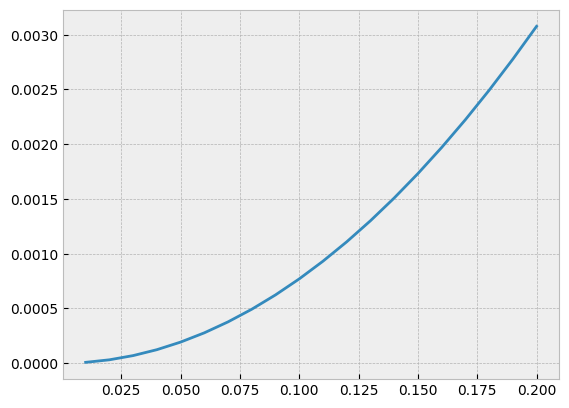

In [4]:
f = lambda x: np.cos(x) # Definimos la función
df = lambda x: -np.sin(x)  # Derivada exacta de la función
d2f = lambda x: -np.cos(x) # Definimos la segunda derivada
x_prueba = np.pi / 8
h_valores = np.linspace(0.01, 0.2, 20)  # Valores de h para evaluar la convergencia 
h_exacta = 0.05

# Método de diferencias finitas
def segunda_derivada(f, x, h):
    '''
    Calcula la segunda derivada de una función f en el punto x usando el método de cinco puntos
    Entrada:
        f: Función a derivar
        x: punto donde se evalúa la segunda derivada
        h: Paso para la aproximación
    Salida:
        segunda_derivada: Array con la aproximación de la segunda derivada en los puntos x
    '''
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

sdf = segunda_derivada(f, x_prueba, h_exacta)
print('<<<<<< Segunda derivada en x = pi/8 con h = 0.05 >>>>>>\n')
print(f'Segunda derivada con diferencias finitas: {sdf:.6f}, error: {np.abs(sdf - d2f(x_prueba)):.6f}')

dff_puntual = []
error_puntual = []
for h in h_valores:
    dff_p = segunda_derivada(f, x_prueba, h)
    error = abs(dff_p - d2f(x_prueba))
    dff_puntual.append(dff_p)
    error_puntual.append(error)

print('\n<<<< Segunda derivada utilizando el método de diferencias finitas >>>>')

tabla = pd.DataFrame({
    'h': h_valores,
    'Segunda derivada': dff_puntual,
    'Error absoluto': error_puntual
})

display(tabla)

plt.plot(h_valores, error_puntual)

# 2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [14]:
f = lambda x: x * np.exp(x)
df = lambda x: (x+1) * np.exp(x)
d2f = lambda x: (x + 2) * np.exp(x)
x = np.linspace(1.8, 2.2, 6)  # Puntos donde evaluamos la derivada
x0 = 2
h_valores = np.linspace(0.01, 0.1, 10)

def derivadas_finitas(f, df, x, h):
    derivada1 = (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
    derivada2 = (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
    return derivada1, derivada2

df1finita = []
df2finita = []
errores1 = []
errores2 = []

for h in h_valores:
    df1, df2 = derivadas_finitas(f, df, x0, h)
    error1 = abs(df(2) - df1)
    error2 = abs(d2f(2) - df2)
    df1finita.append(df1)
    df2finita.append(df2)
    errores1.append(error1)
    errores2.append(error2)

df1_scipy = []
df2_scipy = []
err1 = []
err2 = []

for h in h_valores:
    df1s = derivative(f, x0)
    inter = CubicSpline(x0 , df1s) 
    df1_scipy.append(inter(2))
    err1.append( abs( df(2) - inter(2.0)) )
    df2s = derivative(df, x0)
    inter2 = CubicSpline(x, df2s.df)
    df2_scipy.append(df2s)
    err2.append(abs(d2f(2)-inter(2.0)))


TypeError: float() argument must be a string or a real number, not '_RichResult'